<a href="https://www.kaggle.com/code/ammarbkhet/mv-project?scriptVersionId=212501085" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Create a Python file with class names in the working directory
with open('/kaggle/working/cifar100_classes.py', 'w') as file:
    file.write('class_names = [\n')
    file.write('"apple", "aquarium_fish", "baby", "bear", "beaver",\n')
    file.write('"bed", "bee", "beetle", "bicycle", "bottle",\n')
    file.write('"bowl", "boy", "bridge", "bus", "butterfly",\n')
    file.write('"camel", "can", "castle", "caterpillar", "cattle",\n')
    file.write('"chair", "chimpanzee", "clock", "cloud", "cockroach",\n')
    file.write('"couch", "crab", "crocodile", "cup", "dinosaur",\n')
    file.write('"dolphin", "elephant", "flatfish", "forest", "fox",\n')
    file.write('"girl", "hamster", "house", "kangaroo", "keyboard",\n')
    file.write('"lamp", "lawn_mower", "leopard", "lion", "lizard",\n')
    file.write('"lobster", "man", "maple_tree", "motorcycle", "mountain",\n')
    file.write('"mouse", "mushroom", "oak_tree", "orange", "orchid",\n')
    file.write('"otter", "palm_tree", "pear", "pickup_truck", "pine_tree",\n')
    file.write('"plain", "plate", "poppy", "porcupine", "possum",\n')
    file.write('"rabbit", "raccoon", "ray", "road", "rocket",\n')
    file.write('"rose", "sea", "seal", "shark", "shrew",\n')
    file.write('"skunk", "skyscraper", "snail", "snake", "spider",\n')
    file.write('"squirrel", "streetcar", "sunflower", "sweet_pepper", "table",\n')
    file.write('"tank", "telephone", "television", "tiger", "tractor",\n')
    file.write('"train", "trout", "tulip", "turtle", "wardrobe",\n')
    file.write('"whale", "willow_tree", "wolf", "woman", "worm"]\n')


First we import the libraries we're gonna use 
then load the cifar-100 data , split it to training and testing then printing it's shape
then show the first five images as an example 

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step
Training data shape: (50000, 32, 32, 3)
Testing data shape: (10000, 32, 32, 3)
Number of classes: 100


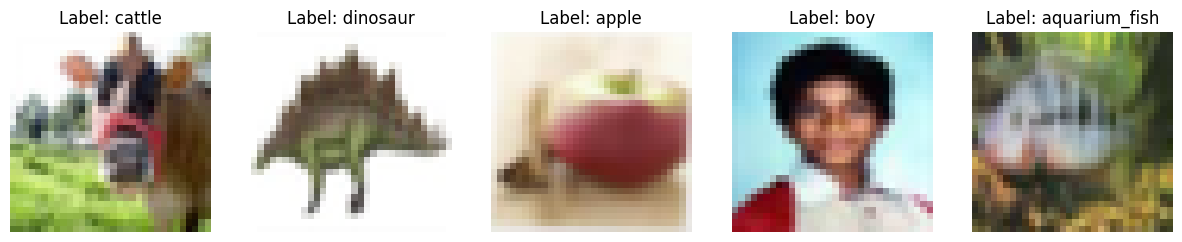

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from cifar100_classes import class_names
from tensorflow.keras.datasets import cifar100

# Load CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Display dataset information
print(f"Training data shape: {x_train.shape}")
print(f"Testing data shape: {x_test.shape}")
print(f"Number of classes: {len(np.unique(y_train))}")

# Example: Display a few images with their labels

fig, axes = plt.subplots(1, 5, figsize=(15, 3))
for i in range(5):
    # print(f"y_train shape is = {y_train.shape}")
    axes[i].imshow(x_train[i])
    axes[i].set_title(f"Label: {class_names[y_train[i][0]]}")
    axes[i].axis("off")
plt.show()


In [3]:
# Normalize pixel values to the range [0, 1]
x_train_normalized = x_train.astype("float32") / 255.0
x_test_normalized = x_test.astype("float32") / 255.0

# Flatten labels for compatibility with scikit-learn
y_train = y_train.flatten()
y_test = y_test.flatten()


In [4]:
print("GPU available: ", tf.config.list_physical_devices('GPU'))


GPU available:  []


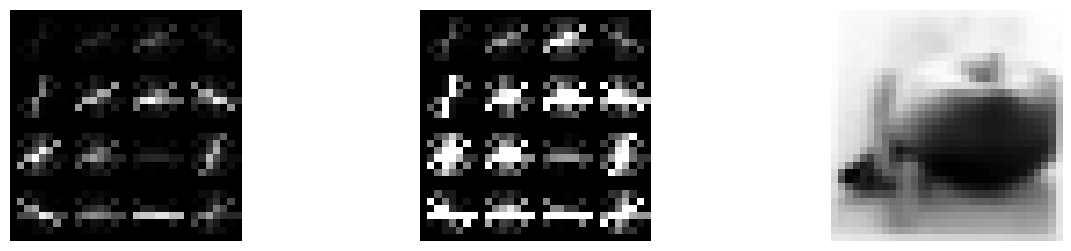

features : (324,)


In [5]:
from skimage.feature import hog
from skimage import exposure
import cv2

# Example function to compute HOG features for an image
def compute_hog(image):
    # Convert image to grayscale (HOG works on grayscale images)
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Compute HOG features and image
    features, hog_image = hog(gray_image, pixels_per_cell=(8, 8), cells_per_block=(2, 2),
                              visualize=True)
    
    # Rescale the image for visualization
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
    
    return features, hog_image, hog_image_rescaled, gray_image

# Example usage on a single image from the dataset
image = x_train[2]  # Using the first image from the training set



fig, axes = plt.subplots(1, 3, figsize=(15, 3))
for i in range(3):
    axes[i].imshow(compute_hog(image)[i+1], cmap='gray')
    axes[i].axis("off")
plt.show()
print(f"features : {compute_hog(image)[0].shape}")


Color histogram shape: (96,)


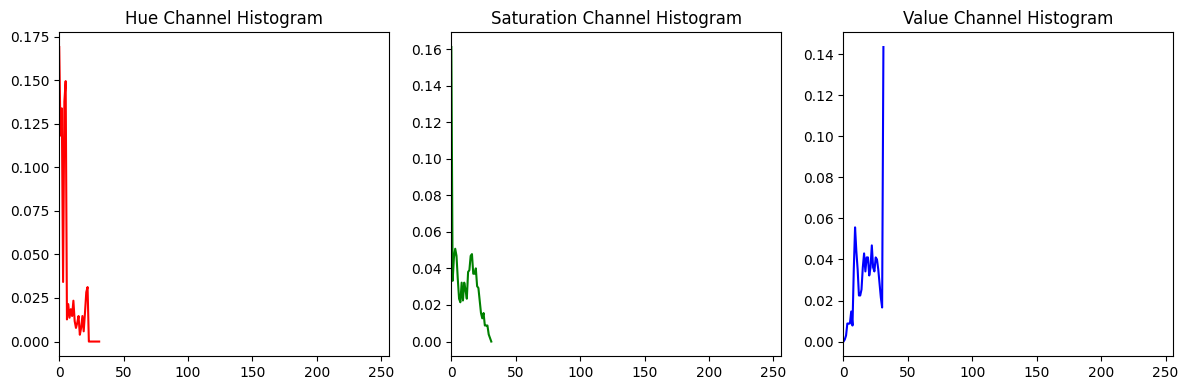

In [6]:

def compute_color_histogram(image, bins=32):
    # Convert image to HSV for better color segmentation
    hsv_image = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
  
 

    # print("Hue channel range: ", np.min(hsv_image[:, :, 0]), np.max(hsv_image[:, :, 0]))
    # print("Saturation channel range: ", np.min(hsv_image[:, :, 1]), np.max(hsv_image[:, :, 1]))
    # print("Value channel range: ", np.min(hsv_image[:, :, 2]), np.max(hsv_image[:, :, 2]))
    
    
    # Compute the histogram for each channel (H, S, V)
    hist_hue = cv2.calcHist([hsv_image], [0], None, [bins], [0, 256])  # Hue channel
    hist_saturation = cv2.calcHist([hsv_image], [1], None, [bins], [0, 256])  # Saturation channel
    hist_value = cv2.calcHist([hsv_image], [2], None, [bins], [0, 256])  # Value channel
    
    # Normalize histograms
    hist_hue /= hist_hue.sum() 
    hist_saturation /= hist_saturation.sum()
    hist_value /= hist_value.sum()
    
    # Concatenate all histograms into a single feature vector
    color_histogram = np.concatenate([hist_hue.flatten(), hist_saturation.flatten(), hist_value.flatten()])
    
    return color_histogram, hist_hue, hist_saturation, hist_value

# Example usage
color_histogram, hist_hue, hist_saturation, hist_value = compute_color_histogram(x_train[0])

print(f'Color histogram shape: {color_histogram.shape}')

# Plot the histograms
plt.figure(figsize=(12, 4))

# Plot for Hue channel
plt.subplot(1, 3, 1)
plt.plot(hist_hue, color='r')
plt.title('Hue Channel Histogram')
plt.xlim([0, 256])

# Plot for Saturation channel
plt.subplot(1, 3, 2)
plt.plot(hist_saturation, color='g')
plt.title('Saturation Channel Histogram')
plt.xlim([0, 256])

# Plot for Value channel
plt.subplot(1, 3, 3)
plt.plot(hist_value, color='b')
plt.title('Value Channel Histogram')
plt.xlim([0, 256])

# Show the histograms
plt.tight_layout()
plt.show()


LBP features shape: (10,)


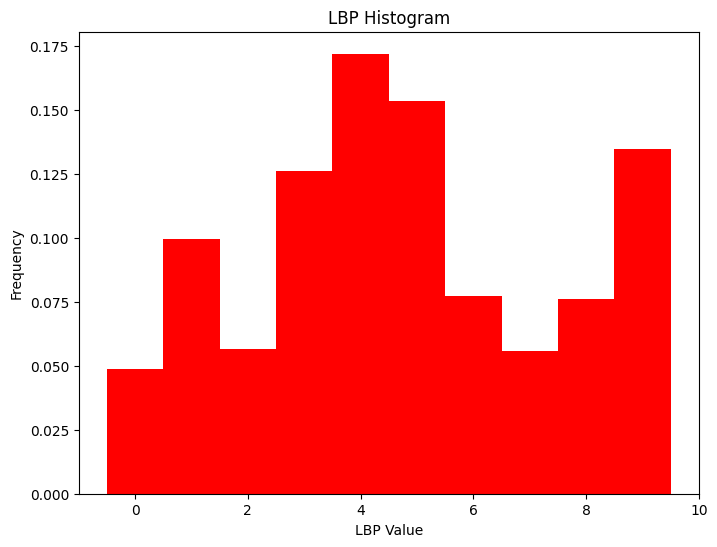

In [7]:
from skimage.feature import local_binary_pattern


def compute_lbp(image, radius=1, n_points=8):
    # Convert image to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    
    # Compute the LBP for the image
    lbp_image = local_binary_pattern(gray_image, n_points, radius, method="uniform")
    
    # Calculate the histogram of LBP values
    lbp_hist, _ = np.histogram(lbp_image.ravel(), bins=np.arange(0, np.max(lbp_image)+2), range=(0, np.max(lbp_image)+1))
    
    # Normalize the histogram
    lbp_hist = lbp_hist.astype('float')
    lbp_hist /= lbp_hist.sum()
    
    return lbp_hist

# Example usage
lbp_features = compute_lbp(x_train[0])

print(f'LBP features shape: {lbp_features.shape}')

plt.figure(figsize=(8, 6))
plt.bar(range(len(lbp_features)), lbp_features, width=1.0, color='red')
plt.title('LBP Histogram')
plt.xlabel('LBP Value')
plt.ylabel('Frequency')
plt.show()




In [9]:
import time
from tqdm import tqdm  # For progress bar

# Initialize lists to store features
hog_features_list = []
color_histograms_list = []
lbp_features_list = []
hog_features_list_test = []
color_histograms_list_test = []
lbp_features_list_test = []

# Start the timer
start_time = time.time()


# Loop through all images in the training set
for i in tqdm(range(len(x_train)), desc="Processing images", unit="image"):
    # Extract HOG, color histogram, and LBP features for each image
    hog_features_list.append(compute_hog(x_train[i])[0])
    color_histograms_list.append(compute_color_histogram(x_train[i])[0])
    lbp_features_list.append(compute_lbp(x_train[i]))
    
# Loop through all images in the testing set
for i in tqdm(range(len(x_test)), desc="Processing images", unit="image"):
    # Extract HOG, color histogram, and LBP features for each image
    hog_features_list_test.append(compute_hog(x_test[i])[0])
    color_histograms_list_test.append(compute_color_histogram(x_test[i])[0])
    lbp_features_list_test.append(compute_lbp(x_test[i]))

# End the timer
end_time = time.time()

# Calculate the time taken for the loop
elapsed_time = end_time - start_time
print(f"Time taken for processing the loop: {elapsed_time:.2f} seconds")


Processing images: 100%|██████████| 10000/10000 [00:42<00:00, 236.12image/s]

Time taken for processing the loop: 254.23 seconds


In [10]:
import pickle

# Save the extracted features (e.g., HOG, color_histogram, and LBP)
features = {
    'hog_features': hog_features_list,
    'color_histograms': color_histograms_list,
    'lbp_features': lbp_features_list,
    'hog_features_test': hog_features_list_test,
    'color_histograms_test': color_histograms_list_test,
    'lbp_features_test': lbp_features_list_test
}

# Save to file
with open('/kaggle/working/features.pkl', 'wb') as f:
    pickle.dump(features, f)


In [8]:
import pickle

# Load the features from the saved file
with open('/kaggle/input/models-data/features.pkl', 'rb') as f:
    features = pickle.load(f)

hog_features_list = features['hog_features']
color_histograms_list = features['color_histograms']
lbp_features_list = features['lbp_features']
hog_features_list_test = features['hog_features_test']
color_histograms_list_test = features['color_histograms_test']
lbp_features_list_test = features['lbp_features_test']

print(f'HOG features loaded: {len(hog_features_list)}')
print(f'Color histograms loaded: {len(color_histograms_list)}')
print(f'LBP features loaded: {len(lbp_features_list)}')
print(f'HOG features Test loaded: {len(hog_features_list_test)}')
print(f'Color histograms Test loaded: {len(color_histograms_list_test)}')
print(f'LBP features Test loaded: {len(lbp_features_list_test)}') 


HOG features loaded: 50000
Color histograms loaded: 50000
LBP features loaded: 50000
HOG features Test loaded: 10000
Color histograms Test loaded: 10000
LBP features Test loaded: 10000


In [9]:
# Convert lists to numpy arrays
hog_features_array = np.array(hog_features_list)
color_histograms_array = np.array(color_histograms_list)
lbp_features_array = np.array(lbp_features_list)
hog_features_array_test = np.array(hog_features_list_test)
color_histograms_array_test = np.array(color_histograms_list_test)
lbp_features_array_test = np.array(lbp_features_list_test)




In [10]:
# Check the shapes of the extracted features
print(f'HOG feature shape: {hog_features_array.shape}')
print(f'Color histogram shape: {color_histograms_array.shape}')
print(f'LBP feature shape: {lbp_features_array.shape}')
print(f'HOG feature test shape: {hog_features_array_test.shape}')
print(f'Color histogram test shape: {color_histograms_array_test.shape}')
print(f'LBP feature test shape: {lbp_features_array_test.shape}') 


HOG feature shape: (50000, 324)
Color histogram shape: (50000, 96)
LBP feature shape: (50000, 10)
HOG feature test shape: (10000, 324)
Color histogram test shape: (10000, 96)
LBP feature test shape: (10000, 10)


In [11]:
from collections import Counter
# Define the knn_classifier with progress tracking
def knn_classifier(train_features, train_labels, test_features, k=3):
    predictions = []
    start_time = time.time()  # Start the timer
    
    for i in tqdm(range(len(test_features)), desc="Processing KNN Predictions"):
        # Calculate distances
        distances = np.linalg.norm(train_features - test_features[i], axis=1)
        
        # Get indices of k nearest neighbors
        k_neighbors = np.argsort(distances)[:k]
        
        # Get the labels of the k nearest neighbors
        k_labels = train_labels[k_neighbors]
        
        # Perform majority voting
        majority_vote = Counter(k_labels).most_common(1)[0][0]
        predictions.append(majority_vote)
    
    elapsed_time = time.time() - start_time  # End the timer
    print(f"\nTime Taken: {elapsed_time:.2f} seconds")
    
    return np.array(predictions)




In [16]:
# Test
y_Knn_hog_predictions = knn_classifier(hog_features_array, y_train, hog_features_array_test)

Processing KNN Predictions: 100%|██████████| 10000/10000 [16:36<00:00, 10.04it/s]


Time Taken: 996.39 seconds


In [18]:
np.save("knn_predictions.npy", y_Knn_hog_predictions)


In [12]:
y_Knn_hog_predictions = np.load("/kaggle/input/models-data/knn_predictions.npy")

In [13]:
# testing the accuracy of applyin Knn on HoG features
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

y_true = y_test
y_pred = y_Knn_hog_predictions

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_true, y_pred, average='weighted')  # Use 'macro' or 'micro' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Detailed Classification Report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.20
Precision: 0.24
Recall: 0.20
F1 Score: 0.21
Confusion Matrix:
[[42  0  1 ...  0  1  1]
 [ 0 17  0 ...  0  0  0]
 [ 1  0  8 ...  1  1  0]
 ...
 [ 0  2  1 ... 14  0  0]
 [ 0  0  2 ...  1  6  1]
 [ 1  1  1 ...  0  0 24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.42      0.49       100
           1       0.30      0.17      0.22       100
           2       0.14      0.08      0.10       100
           3       0.06      0.05      0.05       100
           4       0.14      0.19      0.16       100
           5       0.26      0.09      0.13       100
           6       0.10      0.11      0.10       100
           7       0.12      0.21      0.16       100
           8       0.33      0.36      0.35       100
           9       0.45      0.52      0.48       100
          10       0.20      0.14      0.16       100
          11       0.23      0.12      0.16       100
          12       0.21      0.21      0.

In [14]:
def kmeans_clustering(data, k, max_iters=100):
    # Randomly initialize k centroids
    centroids = data[np.random.choice(data.shape[0], k, replace=False)]
    print(f"Initialized centroids:\n{centroids}\n")
    
    start_time = time.time()  # Start timer for the iteration
    # Use tqdm to create a progress bar
    for iteration in tqdm(range(max_iters), desc="K-Means Progress"):
        
        
        # Assign each point to the nearest centroid
        distances = np.linalg.norm(data[:, np.newaxis] - centroids, axis=2)
        labels = np.argmin(distances, axis=1)
        
        # Update centroids as the mean of assigned points
        new_centroids = np.array([data[labels == i].mean(axis=0) for i in range(k)])
        # Log progress (optional if tqdm is sufficient)
        # print(f"Iteration {iteration + 1}")
        # print(f"Centroids updated:\n{new_centroids}\n")
       
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            print("Convergence reached!\n")
            break
        
        centroids = new_centroids
        
    elapsed_time = time.time() - start_time
        
    print(f"Time taken: {elapsed_time:.2f} seconds")
    print(f"Final centroids:\n{centroids}\n")
    return labels, centroids

In [16]:
import time 
from tqdm import tqdm 
# Test the kmeans algorithm on Hog features
labels, centroids = kmeans_clustering(hog_features_array, 100)

Initialized centroids:
[[0.08657456 0.04137635 0.09659661 ... 0.08164999 0.29379384 0.15692917]
 [0.13201007 0.05854561 0.06767525 ... 0.05053615 0.02308796 0.06689407]
 [0.25467777 0.14712798 0.12582312 ... 0.11006707 0.02561505 0.03137094]
 ...
 [0.00161249 0.         0.         ... 0.00087128 0.         0.        ]
 [0.24574295 0.06851483 0.15065337 ... 0.37498094 0.14740555 0.00868117]
 [0.24810237 0.23926574 0.14154858 ... 0.24888481 0.06974543 0.06422255]]



K-Means Progress: 100%|██████████| 100/100 [18:08<00:00, 10.89s/it]

Time taken: 1088.94 seconds
Final centroids:
[[0.15648712 0.11514963 0.15470923 ... 0.08540215 0.09241769 0.10091151]
 [0.15156301 0.08703775 0.08864504 ... 0.16209303 0.13736123 0.10183854]
 [0.09957479 0.05339116 0.07494035 ... 0.0576708  0.0370694  0.03330506]
 ...
 [0.08534965 0.01861263 0.01902692 ... 0.023591   0.02301629 0.03657779]
 [0.13920132 0.09928765 0.11197549 ... 0.12988233 0.12170043 0.11024499]
 [0.16988419 0.11513725 0.12275381 ... 0.10996996 0.11328319 0.11195647]]



In [17]:
from sklearn.metrics import accuracy_score
from scipy.stats import mode

def evaluate_kmeans_accuracy(labels, ground_truth):
    # Relabel clusters to match ground truth
    new_labels = np.zeros_like(labels)  # Create an array to store aligned labels
    for cluster in np.unique(labels):  # Iterate over each unique cluster label
        mask = (labels == cluster)  # Find data points in this cluster
        # Assign the most common ground truth label in this cluster
        new_labels[mask] = mode(ground_truth[mask])[0]
    
    # Calculate accuracy
    return ground_truth, new_labels


In [18]:
y_true, y_pred = evaluate_kmeans_accuracy(labels, y_train)



In [32]:

# Save the new_labels array
np.save("kmeans_new_labels.npy", y_pred)


In [16]:
y_pred = np.load("/kaggle/input/models-data/knn_predictions.npy")

In [19]:
accuracy = accuracy_score(y_true, y_pred)
print(f"K-means accuracy: {accuracy:.2f}")


recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)


K-means accuracy: 0.11
Precision: 0.24
Recall: 0.11
F1 Score: 0.09
Confusion Matrix:
[[159   0   0 ...   0   0   0]
 [  3   0   0 ...   0   1   0]
 [  3   0   0 ...   0  12   0]
 ...
 [  2   0   0 ...   0  22   0]
 [  9   0   0 ...   0  36   0]
 [ 22   0   0 ...   0   2   0]]


In [20]:
from sklearn.svm import SVC

def train_svm_classifier(train_features, y_train):
    # Initialize the classifier
    svm_classifier = SVC(kernel='linear')
    
    # Start a tqdm progress bar for the training process
    with tqdm(total=1, desc="Training SVM", unit="step") as pbar:
        svm_classifier.fit(train_features, y_train)  # Fit the model using the training data
        pbar.update(1)  # Update progress bar after training
        
    return svm_classifier



In [21]:

def evaluate_ypred(svm_classifier, test_features, y_test):
 
    y_pred = svm_classifier.predict(test_features)  
   
    return y_test, y_pred


In [24]:
from tqdm import tqdm

svm_classifier = train_svm_classifier(hog_features_array, y_train)


Training SVM: 100%|██████████| 1/1 [06:06<00:00, 366.40s/step]


In [23]:
import joblib

# Save the model
def save_svm_classifier(svm_classifier, filename):
    joblib.dump(svm_classifier, filename)
    print(f"Model saved to {filename}")
    
filename = '/kaggle/working/svm_classifier.joblib'
save_svm_classifier(svm_classifier, filename)


Model saved to /kaggle/working/svm_classifier.joblib


In [22]:
import joblib

# Load the model
def load_svm_classifier(filename):
    svm_classifier = joblib.load(filename)
    print(f"Model loaded from {filename}")
    return svm_classifier

svm_classifier = load_svm_classifier('/kaggle/input/svm-data/svm_classifier.joblib')


Model loaded from /kaggle/input/svm-data/svm_classifier.joblib


In [23]:
y_true, y_pred = evaluate_ypred(svm_classifier,hog_features_array_test, y_test ) 

accuracy = accuracy_score(y_true, y_pred)
print(f"Accuracy: {accuracy:.2f}")

precision = precision_score(y_true, y_pred, average='weighted')  
recall = recall_score(y_true, y_pred, average='weighted')
f1 = f1_score(y_true, y_pred, average='weighted')

print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Detailed Classification Report
report = classification_report(y_true, y_pred)
print("Classification Report:")
print(report)

Accuracy: 0.21
Precision: 0.20
Recall: 0.21
F1 Score: 0.20
Confusion Matrix:
[[53  1  1 ...  0  0  0]
 [ 0 14  0 ...  0  1  3]
 [ 2  3  4 ...  0  5  0]
 ...
 [ 0  2  0 ... 18  0  0]
 [ 1  0  2 ...  0  9  2]
 [ 1  1  0 ...  0  0 19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.53      0.53       100
           1       0.12      0.14      0.13       100
           2       0.09      0.04      0.06       100
           3       0.03      0.02      0.02       100
           4       0.06      0.05      0.05       100
           5       0.28      0.35      0.31       100
           6       0.10      0.15      0.12       100
           7       0.08      0.09      0.08       100
           8       0.35      0.42      0.38       100
           9       0.44      0.49      0.46       100
          10       0.26      0.28      0.27       100
          11       0.21      0.16      0.18       100
          12       0.20      0.16      0.